In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 48
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Ved1",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15339 files belonging to 7 classes.


In [5]:
class_names = dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6']

In [6]:
len(dataset)

480

In [7]:
480*32

15360

In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 48, 48, 3)
[6 6 3 0 3 4 3 6 4 3 3 2 4 5 4 0 6 3 5 6 2 3 4 5 3 2 4 3 3 6 0 0]


In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[130.08507    69.00174    43.543404 ]
  [138.59895    75.921875   50.244793 ]
  [148.95833    84.25       56.541664 ]
  ...
  [  3.          2.          0.       ]
  [  2.          2.          2.       ]
  [  2.          2.          2.       ]]

 [[145.54167    80.916664   53.291668 ]
  [154.875      90.25       61.609375 ]
  [163.20833    95.541664   65.765625 ]
  ...
  [  3.          2.          0.       ]
  [  2.          2.          2.       ]
  [  2.          2.          2.       ]]

 [[159.58333    91.166664   59.333332 ]
  [166.78125    97.114586   65.359375 ]
  [171.8368    100.00347    67.58681  ]
  ...
  [  3.          2.          0.       ]
  [  2.          2.          2.       ]
  [  2.          2.          2.       ]]

 ...

 [[170.07466   114.23265    86.75869  ]
  [175.84897   120.84896    90.84896  ]
  [178.41667   121.58681    92.50174  ]
  ...
  [ 27.989622   30.1997     24.196218 ]
  [ 22.125015   22.125015   21.239595 ]
  [ 15.166695   15.166695   15.166695 ]]

 [

In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(48, 48, 3)


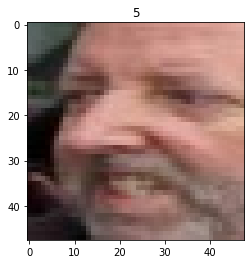

In [11]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
#     plt.axis("off")

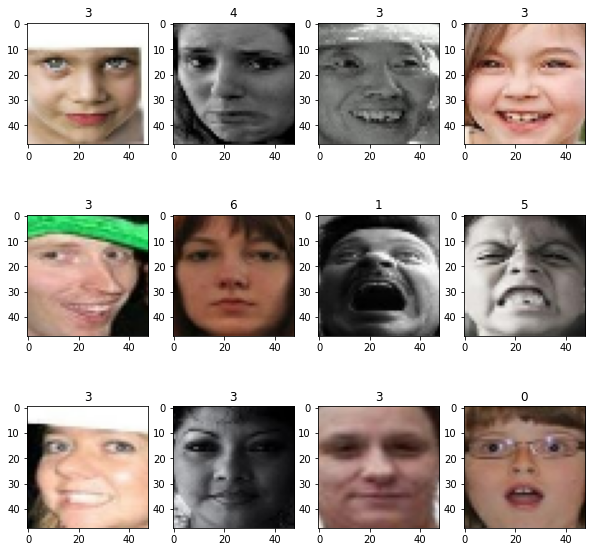

In [12]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
#         plt.axis("off")


In [13]:
len(dataset)

480

In [14]:

train_size = 0.8
len(dataset)*train_size

384.0

In [15]:
train_ds = dataset.take(384)
len(train_ds)

384

In [16]:
test_ds = dataset.skip(384)
len(test_ds)

96

In [17]:
val_size=0.1
len(dataset)*val_size

48.0

In [18]:
val_ds = test_ds.take(48)
len(val_ds)

48

In [19]:
test_ds = test_ds.skip(48)
len(test_ds)

48

In [20]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [21]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [22]:
len(train_ds)

384

In [23]:
len(val_ds)

48

In [24]:
len(test_ds)

48

In [25]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [26]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [27]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 48, 48, 3)           0         
                                                                 
 conv2d (Conv2D)             (32, 46, 46, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 23, 23, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 21, 21, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 10, 10, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 8, 8, 64)           

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
384/384 [==============================] - 47s 87ms/step - loss: 1.6301 - accuracy: 0.3897 - val_loss: 1.5910 - val_accuracy: 0.3848
Epoch 2/50
384/384 [==============================] - 31s 81ms/step - loss: 1.3905 - accuracy: 0.4842 - val_loss: 1.2246 - val_accuracy: 0.5762
Epoch 3/50
384/384 [==============================] - 42s 109ms/step - loss: 1.1123 - accuracy: 0.6009 - val_loss: 1.0259 - val_accuracy: 0.6230
Epoch 4/50
384/384 [==============================] - 38s 99ms/step - loss: 0.9553 - accuracy: 0.6581 - val_loss: 0.8910 - val_accuracy: 0.6914
Epoch 5/50
384/384 [==============================] - 36s 95ms/step - loss: 0.8638 - accuracy: 0.6861 - val_loss: 0.8396 - val_accuracy: 0.6914
Epoch 6/50
384/384 [==============================] - 39s 101ms/step - loss: 0.7857 - accuracy: 0.7200 - val_loss: 0.7358 - val_accuracy: 0.7363
Epoch 7/50
384/384 [==============================] - 36s 94ms/step - loss: 0.7241 - accuracy: 0.7435 - val_loss: 0.6814 - val_accurac

In [32]:
scores = model.evaluate(test_ds)

48/48 [==============================] - 4s 12ms/step - loss: 0.6383 - accuracy: 0.9128


In [33]:
scores

[0.6383407711982727, 0.9127604365348816]

In [34]:

history

In [35]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 384}

In [36]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:

type(history.history['loss'])

list

In [38]:
len(history.history['loss'])

50

In [39]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.6301288604736328,
 1.3905487060546875,
 1.112339973449707,
 0.955263078212738,
 0.8638004064559937]

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

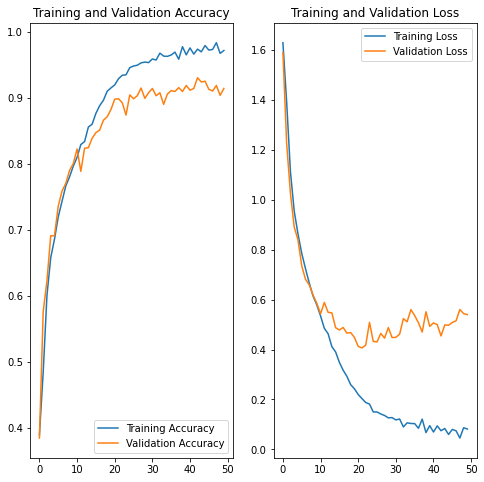

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 3
1/1 [==============================] - 3s 3s/step
predicted label: 3


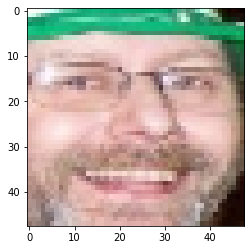

In [42]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


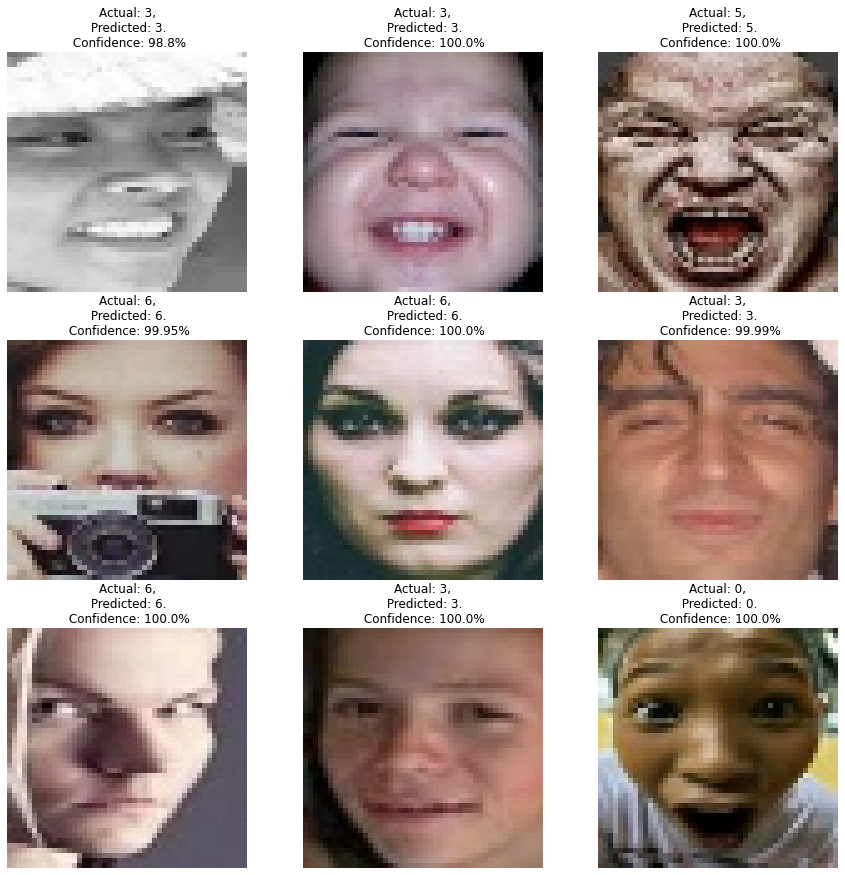

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"C:/Users/HARSHAL/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/6\assets


INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/6\assets


In [46]:

model.save("A-97-VA-91-RAF.h5")